Numpy array vs Python list

In [4]:
# import matplotlib as plt #pip install matplotlib
import matplotlib.pyplot as plt
import random
import numpy as np

In [10]:
# speed
# space

# list

a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []

import time

In [11]:
start = time.time()

for i in range(len(a)):
    c.append(a[i] + b[i])

listTime = time.time() - start
print(listTime)

3.3381447792053223


In [12]:
import sys
print(sys.getsizeof(a))
print(sys.getsizeof(b))
print(sys.getsizeof(c))

89095160
89095160
89095160


In [16]:
# numpy
import numpy as np
a = np.arange(0,10000000)
b = np.arange(10000000,20000000)

start = time.time()

c = a + b

numpyTime = time.time() - start
print(numpyTime)

0.03700447082519531


In [17]:
print(sys.getsizeof(a))
print(sys.getsizeof(b))
print(sys.getsizeof(c))

40000112
40000112
40000112


In [18]:
listTime/numpyTime

90.2092289057265

Advanced Indexing

In [20]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [22]:
a[1][1]

5

In [23]:
a[1,1]

5

In [24]:
a[:4]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [25]:
a[:4,2:4]

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

In [30]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [31]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [34]:
# before first "," means row and after it means columns
a[::2,[0,1,3]]

array([[ 0,  1,  3],
       [ 8,  9, 11],
       [16, 17, 19]])

In [37]:
# np.random.random((3,4)) it will generate random float values in given dimension
a = np.random.random((3,4))
a

array([[0.47951499, 0.48641924, 0.41549619, 0.81497635],
       [0.56013629, 0.29068038, 0.90604585, 0.82407196],
       [0.40514181, 0.74924099, 0.08220047, 0.66604681]])

In [40]:
a = np.random.randint(1,100)
a

69

In [41]:
a = np.random.randint(1,100,24)
a

array([56, 13, 75, 60, 76, 73, 19, 80, 68, 77, 90, 66, 34, 29, 94, 60, 88,
       43, 67, 10, 39, 50, 20, 68])

In [42]:
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[61, 35, 53, 34],
       [82, 16, 94, 42],
       [20, 63, 24, 13],
       [95, 27, 46, 21],
       [10, 14, 30, 34],
       [39, 44, 88, 85]])

In [43]:
a > 50

array([[ True, False,  True, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [ True, False, False, False],
       [False, False, False, False],
       [False, False,  True,  True]])

In [44]:
a[a > 50]

array([61, 53, 82, 94, 63, 95, 88, 85])

In [52]:
(a % 2 == 0) & (a % 4 == 0)

array([[False, False, False, False],
       [False,  True, False, False],
       [ True, False,  True, False],
       [False, False, False, False],
       [False, False, False, False],
       [False,  True,  True, False]])

In [53]:
a[(a % 2 == 0) & (a % 4 == 0)]

array([16, 20, 24, 44, 88])

In [57]:
a[~(a % 2 == 0)]

array([61, 35, 53, 63, 13, 95, 27, 21, 39, 85])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [60]:
# same shape
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [61]:
# diff shape
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)
print(b)

print(a+b)

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [62]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [15]:
import numpy as np
a = np.arange(12).reshape(3,4)
b = np.arange(3)
# print(b)
# b = b[:, np.newaxis]
print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [64]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [65]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [66]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [67]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [69]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

**. The entire story is this that if there is 1D in some of the array and the orhter dimesnsion is same as the other arrya than it will shrink the size of the array and will performe broadcasting.**


### Working with mathematical formulas

In [16]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [17]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [19]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

465.92

In [20]:
# binary cross entropy
np.mean((actual - predicted)**2)

465.92

### Working with missing values

In [21]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [28]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

In [26]:
a[np.isnan(a)]
np.isnan(a).any()

True

### Plotting Graphs

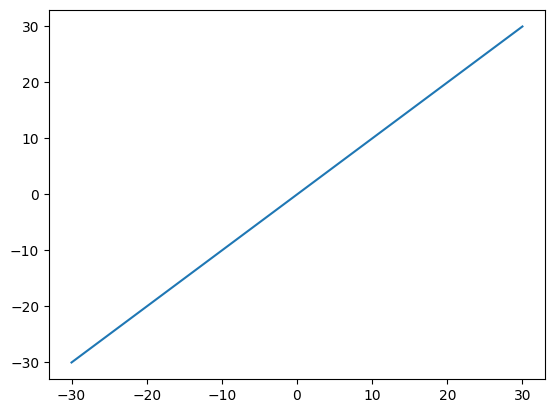

In [40]:
x = np.linspace(-30, 30, 40)
y = x

plt.plot(x, y)

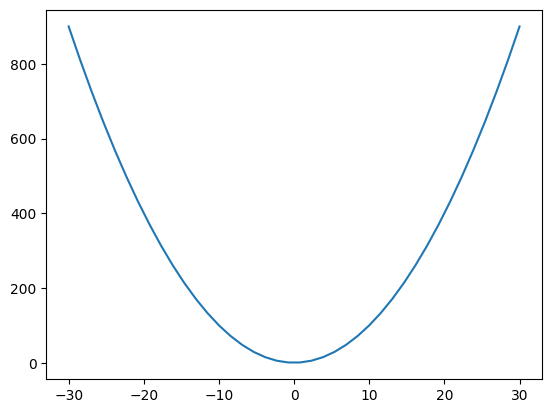

In [41]:
x = np.linspace(-30, 30, 40)
y = x**2

plt.plot(x, y)

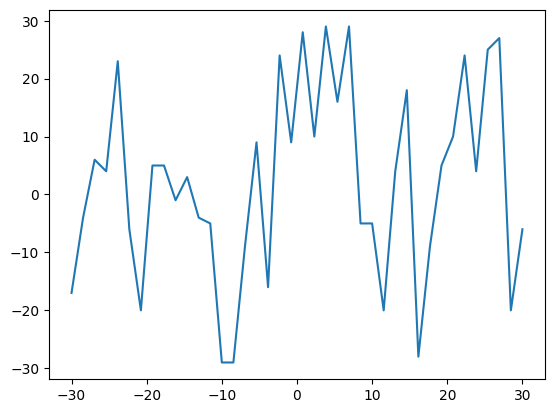

In [8]:
x = np.linspace(-30, 30, 40)
y = np.random.randint(-30, 30, 40)
# print(x, y)

plt.plot(x, y)
# plt.scatter(x, y)

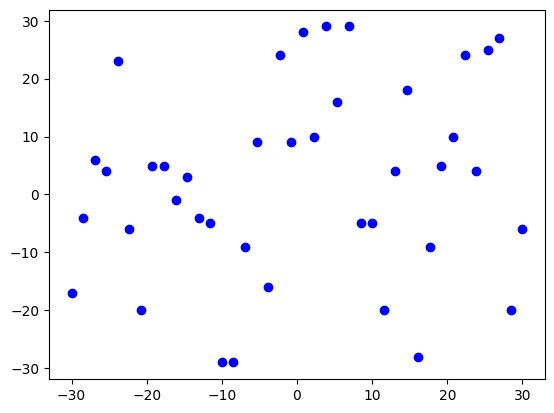

In [10]:
plt.scatter(x, y, color='blue')